In [1]:
import numpy as np
from sklearn.preprocessing import Binarizer

age = np.array([[6],[12],[20],[36]])

In [2]:
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2]])

In [3]:
# clustering observations 
import pandas as pd 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [4]:
features, original_class = make_blobs(
    n_samples=50,
    n_features=2,
    centers=3, 
    random_state=1
)

In [5]:
# initialize the data
cluster_maker = KMeans(3, random_state=0)

# fit on the data 
cluster_maker.fit(features)


KMeans(n_clusters=3, random_state=0)

In [7]:
# create dataframe to compare the resule 
df = pd.DataFrame(features, columns=['feature1', 'feature2'])

df["group"] = cluster_maker.predict(features)

df["original_class"] = original_class

In [8]:
df.head()

,feature1,feature2,group,original_class
0,-9.877554,-3.336145,2,1
1,-7.287210,-8.353986,0,2
2,-6.943061,-7.023744,0,2
3,-7.440167,-8.791959,0,2
4,-6.641388,-8.075888,0,2


In [9]:
pd.crosstab(df.group, df.original_class)

original_class,0,1,2
group,,,
0,0,0,16
1,17,0,0
2,0,17,0


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

data = pd.read_csv("/mnt/c/Users/rjn/Documents/GitHub/Semester2/2203/lecture6/file.csv")
data = data[["LotArea", "SalePrice"]]

In [31]:
train,test = train_test_split(data, train_size=0.8)

Text(0, 0.5, 'Inertia')

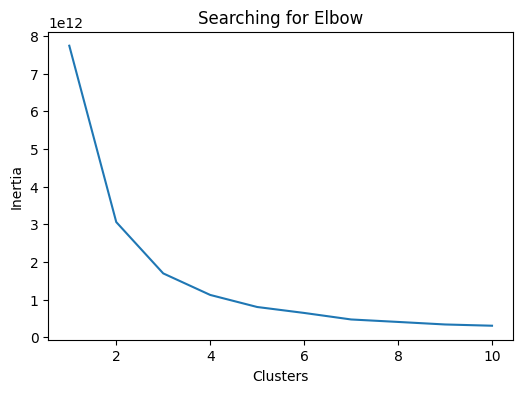

In [32]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=list(range(1, 11)), y=inertias, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [33]:
from sklearn.manifold import TSNE
import plotly.express as px

km2 = KMeans(n_clusters=3).fit(train)


/home/rjn/.conda/envs/main_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



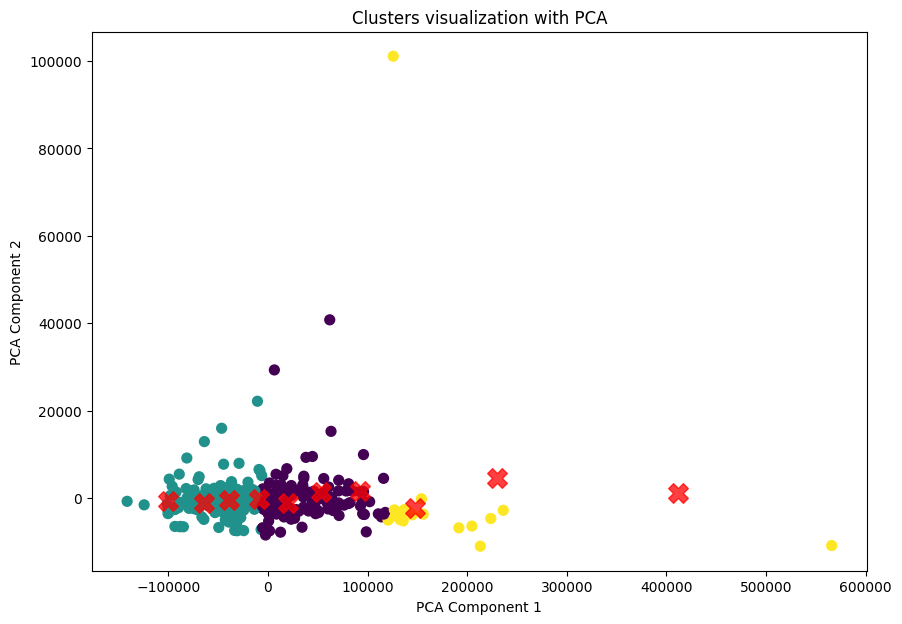

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


labels = km2.predict(test)


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50)
centers_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Handle Missing Data

In [36]:
import numpy as np 
from sklearn.impute import KNNImputer

In [37]:
x = [[1,2,np.nan], [3,4,3], [np.nan, 5,6]]
imputer = KNNImputer(n_neighbors=2)

In [39]:
imputer.fit_transform(x)

array([[1. , 2. , 4.5],
       [3. , 4. , 3. ],
       [2. , 5. , 6. ]])

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
# initizlize the imputer 

imputer_ = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer_.fit_transform(x)

array([[1. , 2. , 4.5],
       [3. , 4. , 3. ],
       [2. , 5. , 6. ]])

In [42]:
imputer_.transform(x)

array([[1. , 2. , 4.5],
       [3. , 4. , 3. ],
       [2. , 5. , 6. ]])

In [43]:
# https://stackoverflow.com/questions/23838056/what-is-the-difference-between-transform-and-fit-transform-in-sklearn

[[1, 2, nan], [3, 4, 3], [nan, 5, 6]]

In [44]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [47]:
lb.fit_transform(["yes","no","yes","no"])

array([[1],
       [0],
       [1],
       [0]])

In [48]:
lb.fit_transform(["yes","no","yes","no","rajan"])


array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [49]:
preprocessing.LabelEncoder().fit_transform(["yes","no","yes","no"])

array([1, 0, 1, 0])

In [50]:
preprocessing.LabelEncoder().fit_transform(["yes","no","yes","no","rajan"])

array([2, 0, 2, 0, 1])

In [51]:
df = pd.DataFrame(
    
    {
        "X" : ["a","b","C"], 
        "Y" : ["B","A","C"]
    }
)

In [52]:
pd.get_dummies(df, prefix=["COLX","COLY"])

,COLX_C,COLX_a,COLX_b,COLY_A,COLY_B,COLY_C
0,False,True,False,False,True,False
1,False,False,True,True,False,False
2,True,False,False,False,False,True
